# Achievement First Data Engineer Exercise

Please save your own copy of the collab so that you can edit it.

## Background

Achievement First needs your help urgently! Due to a meteor, we have tragically could only get these csvs sourced from our Student Information System, Infinite Campus:

1. calendar.csv
2. person.csv
3. enrollment.csv
4. school.csv
5. schoolyear.csv

Below is the schema doc describing the relatioship between each table.

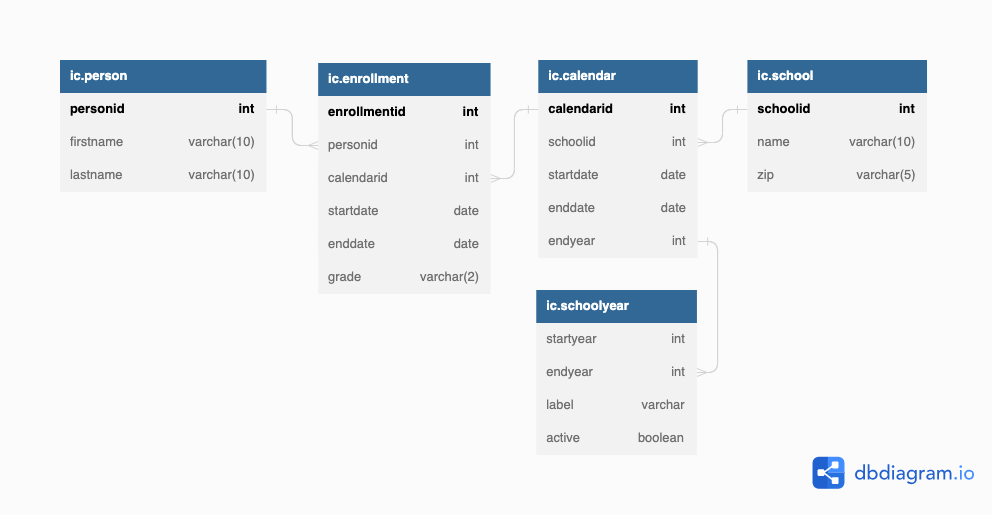


Feel free to use whatever sources (Google, Stack Overflow) and any packages you see fit to use. Be prepared to explain how your code works. Thank you for taking the time.

Let me know if you have any questions, winstonlin@achievementfirst.org.

# Directions:

## Part 1: SQL

1. Load the csvs into a sqlite3 database named ic using the code given to you below. Feel free to change the functions as you see fit.

2. Write a function that will execute a sql query and save changes to the database.

3. The active schoolyear is 2020. Update the schoolyear table using (2).

### Write a sql query whose result answere the following questions.

1. How many unique students are enrolled in the active school year?
2. How many students were enrolled in school bp as of 10/1/2019? (that is startdate is on or before 10/1 and enddate is after 10/1)
3. Who are the 3 students with the most recent startdate of the students that have multiple enrollments in the active school year?

## Part 2: Python

For this section, it is recommended that you just use the pandas dfs provided below.

### Add city to the School df: API

Utilize the following api [link](https://www.zippopotam.us/) to create a 'city' column that is the 'place name' from api pull using the 'zip' column from the school pandas dataframe.

### Add final_enddate to the Enrollment df: Input missing Data

Add final_enddate which should be enddate as reported in the enrollment table if it exists. If enddate is missing, then report the calendar enddate for that enrollment record.

### Export active enrollment

Merge the enrollment df with school df using joins defined by the schema doc above.

Export the resulting df as a csv along with the additional columns:

1. schoolid
2. schoolname
3. endyear
4. city (see above)
5. final_enddate (see above)


# Deliverables:
1. .DB file with updated database
2. Enrollment Table as csv with the added columns
3. Google Colab notebook
	1. Function to execute sql query
	2. sql statements
		1. Update sql statement
		2. SQL queries questions

In [1]:
import pandas as pd
import sqlite3

def df_to_sqlDB(input_df: pd.DataFrame,
                table_name: str,
                db_name: str = 'default.db') -> None:

    '''Take a Pandas dataframe `input_df` and upload it to `table_name` SQLITE table
    Args:
        input_df (pd.DataFrame): Dataframe containing data to upload to SQLITE
        table_name (str): Name of the SQLITE table to upload to
        db_name (str, optional): Name of the SQLITE Database in which the table is created.
                                 Defaults to 'default.db'.
    '''

    # Step 1: Setup local logging
    import logging
    logging.basicConfig(level=logging.INFO,
                        format='%(asctime)s %(levelname)s: %(message)s',
                        datefmt='%Y-%m-%d %H:%M:%S')

    # Step 2: Find columns in the dataframe
    cols = input_df.columns
    cols_string = ','.join(cols)
    val_wildcard_string = ','.join(['?'] * len(cols))

    # Step 3: Connect to a DB file if it exists, else create a new file
    con = sqlite3.connect(db_name)
    cur = con.cursor()
    logging.info(f'SQL DB {db_name} created')

    # Step 4: Create Table
    sql_string = f"""CREATE TABLE {table_name} ({cols_string});"""
    cur.execute(sql_string)
    logging.info(f'SQL Table {table_name} created with {len(cols)} columns')

    # Step 5: Upload the dataframe
    rows_to_upload = input_df.to_dict(orient='split')['data']
    sql_string = f"""INSERT INTO {table_name} ({cols_string}) VALUES ({val_wildcard_string});"""
    cur.executemany(sql_string, rows_to_upload)
    logging.info(f'{len(rows_to_upload)} rows uploaded to {table_name}')

    # Step 6: Commit the changes and close the connection
    con.commit()
    con.close()

def sql_query_to_pd(sql_query_string: str, db_name: str ='default.db') -> pd.DataFrame:
    '''Execute an SQL query and return the results as a pandas dataframe
    Args:
        sql_query_string (str): SQL query string to execute
        db_name (str, optional): Name of the SQLITE Database to execute the query in.
                                 Defaults to 'default.db'.
    Returns:
        pd.DataFrame: Results of the SQL query in a pandas dataframe
    '''
    # Step 1: Connect to the SQL DB
    con = sqlite3.connect(db_name)

    # Step 2: Execute the SQL query
    cursor = con.execute(sql_query_string)

    # Step 3: Fetch the data and column names
    result_data = cursor.fetchall()
    cols = [description[0] for description in cursor.description]

    # Step 4: Close the connection
    con.close()

    # Step 5: Return as a dataframe
    return pd.DataFrame(result_data, columns=cols)

# TODO Write function to execute a sql query

def execute_sql_query(sql_query_string: str, db_name: str = 'default.db') -> None:
  '''
  Execute an SQL query and save changes to the database
    Args:
        sql_query_string (str): SQL query string to execute
        db_name (str, optional): Name of the SQLITE Database to execute the query in.
                                 Defaults to 'default.db'.
  '''

  # Step 1: Connect to the SQL DB
  con = sqlite3.connect(db_name)

  # Step 2: Execute the SQL query
  cursor = con.execute(sql_query_string)

  # Step 3: Commit the changes to the database
  con.commit()
  con.close()




In [2]:
import pandas as pd


calendar = pd.read_csv('https://af-data-engineer-technical-exercise.s3.us-east-2.amazonaws.com/calendar.csv')
person = pd.read_csv('https://af-data-engineer-technical-exercise.s3.us-east-2.amazonaws.com/person.csv')
school = pd.read_csv('https://af-data-engineer-technical-exercise.s3.us-east-2.amazonaws.com/school.csv')
enrollment = pd.read_csv('https://af-data-engineer-technical-exercise.s3.us-east-2.amazonaws.com/enrollment.csv')
schoolyear = pd.read_csv('https://af-data-engineer-technical-exercise.s3.us-east-2.amazonaws.com/schoolyear.csv')

print(person.head())
print(school.head())
print(enrollment.head())
print(calendar.head())
print(schoolyear.head())


   personid firstname lastname
0     24646   Charles     Read
1     26658      John     Palm
2     30559  Gabriela  Jeffrey
3     32384     David    Scott
4     32389      Stan    Watts
   schoolid   zip name
0        28  6511   aa
1        29  6511   ab
2        30  6511   ac
3        31  6513   ad
4        32  6513   ae
   enrollmentid  personid  calendarid grade   startdate enddate
0        100268     24646         332    04  2018-08-16     NaN
1        100093     26658         332    04  2018-08-16     NaN
2        100228     30559         332    03  2018-08-16     NaN
3        100238     32384         332    03  2018-08-16     NaN
4        100184     32389         332    03  2018-08-16     NaN
   calendarid  schoolid calendar_startdate calendar_enddate  endyear
0         332        28         2018-08-15       2019-06-14     2019
1         333        29         2018-08-15       2019-06-14     2019
2         334        30         2018-08-15       2019-06-14     2019
3         335   

In [3]:
def load_data_to_sqlDB():
    # Load CSV data from URLs into DataFrames
    calendar = pd.read_csv('https://af-data-engineer-technical-exercise.s3.us-east-2.amazonaws.com/calendar.csv')
    person = pd.read_csv('https://af-data-engineer-technical-exercise.s3.us-east-2.amazonaws.com/person.csv')
    school = pd.read_csv('https://af-data-engineer-technical-exercise.s3.us-east-2.amazonaws.com/school.csv')
    enrollment = pd.read_csv('https://af-data-engineer-technical-exercise.s3.us-east-2.amazonaws.com/enrollment.csv')
    schoolyear = pd.read_csv('https://af-data-engineer-technical-exercise.s3.us-east-2.amazonaws.com/schoolyear.csv')

    # Load each DataFrame into the SQLite database 'ic.db' using df_to_sqlDB() function
    df_to_sqlDB(calendar, 'calendar', 'ic.db')
    df_to_sqlDB(person, 'person', 'ic.db')
    df_to_sqlDB(school, 'school', 'ic.db')
    df_to_sqlDB(enrollment, 'enrollment', 'ic.db')
    df_to_sqlDB(schoolyear, 'schoolyear', 'ic.db')

    # Print a message indicating that the data has been loaded into the SQLite database
    print("Data loaded into SQLite database 'ic.db'")

In [4]:
def update_active_schoolyear():
    # query to set the 'active' column to False for any row where 'active' is True
    sql_query = "UPDATE schoolyear SET active = False WHERE active = True;"
    execute_sql_query(sql_query, 'ic.db')

    # Active year is 2020
    # query to set the 'active' column to True for rows where the 'startyear' is 2020 and 'endyear' is 2021
    sql_query = "UPDATE schoolyear SET active = True WHERE startyear = 2020 AND endyear = 2021;"
    execute_sql_query(sql_query, 'ic.db')

    # Print a message indicating that the active school year has been updated to 2020 in the 'schoolyear' table
    print("Active school year updated to 2020 in 'schoolyear' table.")


In [5]:
def answer_questions():
    # Question 1: How many unique students are enrolled in the active school year?
    # here the active value is a boolean. Meaning that if we have a 1, the value would be "True". This means that it is an active year.
    sql_query = "SELECT COUNT(DISTINCT personid) FROM enrollment WHERE calendarid IN (SELECT calendarid FROM schoolyear WHERE active = 1);"
    result = sql_query_to_pd(sql_query, 'ic.db')
    print("Question 1: Number of unique students enrolled in the active school year:", result.iloc[0, 0])

    # Question 2: How many students were enrolled in school bp as of 10/1/2019?
    sql_query = """
    SELECT COUNT(DISTINCT personid) FROM enrollment
    WHERE personid IN (
        SELECT personid FROM enrollment
        WHERE startdate <= '2019-10-01' AND (enddate IS NULL OR enddate > '2019-10-01')
    ) AND personid IN (
        SELECT personid FROM school
        WHERE name = 'bp'
    );
    """
    # the end date has to either be: Null (student is still enrolled) OR just endate is greater than 2019-10-01 because that means they will still be enrolled today
    result = sql_query_to_pd(sql_query, 'ic.db')
    print("Question 2: Number of students enrolled in school 'bp' as of 10/1/2019:", result.iloc[0, 0])

    # Question 3: Who are the 3 students with the most recent startdate of the students that have multiple enrollments in the active school year?
    sql_query = """
      SELECT p.firstname, p.lastname, e.personid, MAX(e.startdate) AS most_recent_startdate
      FROM enrollment e
      INNER JOIN person p ON p.personid = e.personid
      WHERE e.personid IN (
          SELECT personid FROM enrollment
          WHERE calendarid IN (SELECT calendarid FROM schoolyear WHERE active = 1)
          GROUP BY personid
          HAVING COUNT(DISTINCT calendarid) > 1
      )
      GROUP BY e.personid, p.firstname, p.lastname
      ORDER BY most_recent_startdate DESC
      LIMIT 3;
    """
    result = sql_query_to_pd(sql_query, 'ic.db')
    print("Question 3: The 3 students with the most recent startdate and multiple enrollments in the active school year:")
    print(result)


In [6]:
load_data_to_sqlDB()

OperationalError: ignored

In [7]:
update_active_schoolyear()

Active school year updated to 2020 in 'schoolyear' table.


In [8]:
answer_questions()

Question 1: Number of unique students enrolled in the active school year: 19263
Question 2: Number of students enrolled in school 'bp' as of 10/1/2019: 14446
Question 3: The 3 students with the most recent startdate and multiple enrollments in the active school year:
  firstname lastname  personid most_recent_startdate
0    Victor   Zapien    119893            2021-03-19
1    Myrtle   Warner    125781            2021-02-24
2      Paul  Vickery    134612            2021-02-22


# ** Part 2: Python**

In [9]:
# PART 2

Add city to the School df: API
Utilize the following api link to create a 'city' column that is the 'place name' from api pull using the 'zip' column from the school pandas dataframe.

In [10]:
import pandas as pd
import sqlite3
import requests

# Function to load 'calendar' DataFrame from the database
def load_calendar_from_sqlDB(db_name='ic.db'):
    con = sqlite3.connect(db_name)
    sql_query = "SELECT * FROM calendar;"
    calendar_df = pd.read_sql_query(sql_query, con)
    con.close()
    return calendar_df

# Function to load 'enrollment' DataFrame from the database
def load_enrollment_from_sqlDB(db_name='ic.db'):
    con = sqlite3.connect(db_name)
    sql_query = "SELECT * FROM enrollment;"
    enrollment_df = pd.read_sql_query(sql_query, con)
    con.close()
    return enrollment_df

# Function to load 'school' DataFrame from the database
def load_school_from_sqlDB(db_name='ic.db'):
    con = sqlite3.connect(db_name)
    sql_query = "SELECT * FROM school;"
    school_df = pd.read_sql_query(sql_query, con)
    con.close()
    return school_df

'''
Sample JSON Res
{
   "post code": "90210",
   "country": "United States",
   "country abbreviation": "US",
   "places": [
       {
           "place name": "Beverly Hills",
           "longitude": "-118.4065",
           "state": "California",
           "state abbreviation": "CA",
           "latitude": "34.0901"
       }
   ]
}
'''

# Function to get city from zip using API
def get_city_from_zip(zip_code):
    # Convert zip code to string to handle both four and five digits
    zip_code = str(zip_code)

    # If zip code has only four digits, add a leading zero to make it five digits
    if len(zip_code) == 4:
        zip_code = '0' + zip_code

    # API endpoint for fetching city based on zip code
    api_url = f"https://api.zippopotam.us/us/{zip_code}"

    try:
        response = requests.get(api_url)
        data = response.json()

        if 'places' in data and data['places']:
            city = data['places'][0]['place name']
            return city
        else:
            print(f"No city found for zip {zip_code}")
            return None

    except Exception as e:
        print(f"Error fetching city for zip {zip_code}: {e}")
        return None


# Load DataFrames from the database
calendar_df = load_calendar_from_sqlDB()
enrollment_df = load_enrollment_from_sqlDB()
school_df = load_school_from_sqlDB()


# Adding 'city' column to the 'school' DataFrame
school_df['city'] = school_df['zip'].apply(get_city_from_zip)

print(school_df)




    schoolid    zip name        city
0         28   6511   aa   New Haven
1         29   6511   ab   New Haven
2         30   6511   ac   New Haven
3         31   6513   ad   New Haven
4         32   6513   ae   New Haven
5         71   6513   af   New Haven
6         33  11203   ag    Brooklyn
7         34  11203   ah    Brooklyn
8         50  11216   ai    Brooklyn
9         35  11207   aj    Brooklyn
10        51  11208   ak    Brooklyn
11        62  11221   al    Brooklyn
12        36  11207   am    Brooklyn
13        37  11237   an    Brooklyn
14        76  11207   ao    Brooklyn
15        84  11207   ap    Brooklyn
16        56  11238   aq    Brooklyn
17        38  11238   ar    Brooklyn
18        54   6608   as  Bridgeport
19        39   6608   at  Bridgeport
20        41   6112   au    Hartford
21        59   6112   av    Hartford
22        85   6112   aw    Hartford
23        49  11233   ax    Brooklyn
24        58  11233   ay    Brooklyn
25        74  11207   az    Brooklyn
2

Add final_enddate to the Enrollment df: Input missing Data
Add final_enddate which should be enddate as reported in the enrollment table if it exists. If enddate is missing, then report the calendar enddate for that enrollment record.

In [11]:

# Function to load 'enrollment' DataFrame from the database
def load_enrollment_from_sqlDB(db_name='ic.db'):
    con = sqlite3.connect(db_name)
    sql_query = "SELECT * FROM enrollment;"
    enrollment_df = pd.read_sql_query(sql_query, con)
    con.close()
    return enrollment_df

# gets our enrollment dataframe
enrollment_df = load_enrollment_from_sqlDB()

# Function to load 'schoolyear' DataFrame from the database
def load_schoolyear_from_sqlDB(db_name='ic.db'):
    con = sqlite3.connect(db_name)
    sql_query = "SELECT * FROM schoolyear;"
    schoolyear_df = pd.read_sql_query(sql_query, con)
    con.close()
    return schoolyear_df

# gets our schoolyear dataframe
schoolyear_df = load_schoolyear_from_sqlDB()

# Function to load 'calendar' DataFrame from the database
def load_calendar_from_sqlDB(db_name='ic.db'):
    con = sqlite3.connect(db_name)
    sql_query = "SELECT * FROM calendar;"
    calendar_df = pd.read_sql_query(sql_query, con)
    con.close()
    return calendar_df

# gets our calendar dataframe
calendar_df = load_calendar_from_sqlDB()

# Function to load 'school' DataFrame from the database
def load_school_from_sqlDB(db_name='ic.db'):
    con = sqlite3.connect(db_name)
    sql_query = "SELECT * FROM school;"
    school_df = pd.read_sql_query(sql_query, con)
    con.close()
    return school_df

# Adding 'final_enddate' column to the 'enrollment' DataFrame
def get_final_enddate(row):
    if pd.notnull(row['enddate']):
        return row['enddate']
    else:
        calendarid = row['calendarid']
        calendar_enddate = calendar_df[calendar_df['calendarid'] == calendarid]['calendar_enddate'].iloc[0]
        return calendar_enddate

enrollment_df['final_enddate'] = enrollment_df.apply(get_final_enddate, axis=1)

print(enrollment_df)
print(school_df)

       enrollmentid  personid  calendarid grade   startdate enddate  \
0            100268     24646         332    04  2018-08-16    None   
1            100093     26658         332    04  2018-08-16    None   
2            100228     30559         332    03  2018-08-16    None   
3            100238     32384         332    03  2018-08-16    None   
4            100184     32389         332    03  2018-08-16    None   
...             ...       ...         ...   ...         ...     ...   
44091        144724    158369         457    KG  2020-11-02    None   
44092        144771    158553         457    01  2021-01-18    None   
44093        144797    158698         457    KG  2021-03-31    None   
44094        144798    158717         457    KG  2021-04-26    None   
44095        144734    138848         459    01  2020-09-02    None   

      final_enddate  
0        2019-06-14  
1        2019-06-14  
2        2019-06-14  
3        2019-06-14  
4        2019-06-14  
...            

-> Each row in the "enrollment_df" DataFrame now includes the "final_enddate" column, which represents the end date for each enrollment record.

-> "final_enddate" is either the "enddate" from the "enrollment" table if it exists or the "calendar_enddate" from the "calendar" table if "enddate" is missing

Export active enrollment
Merge the enrollment df with school df using joins defined by the schema doc above.

Export the resulting df as a csv along with the additional columns:

schoolid
schoolname
endyear
city (see above)
final_enddate (see above)

In [12]:
# Step 1: Merge 'enrollment_df' with 'school_df' based on 'calendarid'
merged_df = enrollment_df.merge(school_df, left_on='calendarid', right_on='schoolid', how='inner')

# Step 2: Add additional columns 'schoolid', 'schoolname', 'endyear', 'city', and 'final_enddate'
merged_df['schoolid'] = merged_df['schoolid']
merged_df['schoolname'] = merged_df['name']
merged_df['endyear'] = merged_df['enddate'].apply(lambda x: x[:4] if pd.notnull(x) else None)
merged_df['city'] = merged_df['city']
merged_df['final_enddate'] = merged_df['final_enddate']

# Step 3: Filter active enrollments (where enddate is None)
active_enrollment_df = merged_df[merged_df['enddate'].isnull()]

# Step 4: Select only the required columns
result_df = active_enrollment_df[['schoolid', 'schoolname', 'endyear', 'city', 'final_enddate']]

# Step 5: Export the resulting DataFrame as a CSV file
result_df.to_csv('active_enrollment.csv', index=False)

# Print the first few rows of the resulting DataFrame
print(result_df.head())


Empty DataFrame
Columns: [schoolid, schoolname, endyear, city, final_enddate]
Index: []


# Debugging error


In [13]:
print("Columns in enrollment_df:", enrollment_df.columns)
print("Columns in school_df:", school_df.columns)


Columns in enrollment_df: Index(['enrollmentid', 'personid', 'calendarid', 'grade', 'startdate',
       'enddate', 'final_enddate'],
      dtype='object')
Columns in school_df: Index(['schoolid', 'zip', 'name', 'city'], dtype='object')


In [14]:
# Check if 'school_df' contains any rows with missing or NaN values in the 'city' column
missing_city_rows = school_df[school_df['city'].isnull()]
print(missing_city_rows)


Empty DataFrame
Columns: [schoolid, zip, name, city]
Index: []


In [15]:
# Test the 'get_city_from_zip' function for a specific zip code
zip_code = '2908'
city_for_zip = get_city_from_zip(zip_code)
print(f"City for zip {zip_code}: {city_for_zip}")

City for zip 2908: Providence


In [16]:
# Print columns of enrollment_df
print("Columns of enrollment_df:")
print(enrollment_df)

# Print columns of school_df
print("\nColumns of school_df:")
print(school_df)

print("\nColumns of calendar_df:")
print(calendar_df)



print("\nColumns of schoolyear_df:")
print(schoolyear_df)

Columns of enrollment_df:
       enrollmentid  personid  calendarid grade   startdate enddate  \
0            100268     24646         332    04  2018-08-16    None   
1            100093     26658         332    04  2018-08-16    None   
2            100228     30559         332    03  2018-08-16    None   
3            100238     32384         332    03  2018-08-16    None   
4            100184     32389         332    03  2018-08-16    None   
...             ...       ...         ...   ...         ...     ...   
44091        144724    158369         457    KG  2020-11-02    None   
44092        144771    158553         457    01  2021-01-18    None   
44093        144797    158698         457    KG  2021-03-31    None   
44094        144798    158717         457    KG  2021-04-26    None   
44095        144734    138848         459    01  2020-09-02    None   

      final_enddate  
0        2019-06-14  
1        2019-06-14  
2        2019-06-14  
3        2019-06-14  
4        20

In [17]:
# Function to get cities for all zip codes asynchronously
def get_cities_for_zip_codes(zip_codes):
    # Use ThreadPoolExecutor to execute the get_city_from_zip function concurrently for all zip codes
    with concurrent.futures.ThreadPoolExecutor() as executor:
        # Use executor.map to fetch cities for all zip codes and store results in a list
        city_list = list(executor.map(get_city_from_zip, zip_codes))
    return city_list

In [18]:
# Check if 'city' is in the enrollment_df columns
if 'city' in school_df.columns:
    print("The 'city' column is available in the school_df.")
else:
    print("The 'city' column is not available in the school_df.")


The 'city' column is available in the school_df.


In [27]:
'''
concurrent.futures: This module provides a high-level interface for asynchronously executing callables.
It includes the ThreadPoolExecutor and ProcessPoolExecutor classes, which allow us to perform tasks
concurrently using multiple threads or processes, respectively. In the provided code,
ThreadPoolExecutor is used to perform asynchronous execution of the get_city_from_zip
function for multiple zip codes concurrently.
'''
import concurrent.futures
'''
This is a popular library for making HTTP requests in Python. It provides simple
convenient methods to send HTTP requests to web servers and handle their responses.
The requests module is used in the get_city_from_zip function to send an API request and receive the corresponding
city information for a given zip code.
'''
import requests

# Function to get cities for all zip codes asynchronously
def get_cities_for_zip_codes(zip_codes):
    # Use ThreadPoolExecutor to execute the get_city_from_zip function concurrently for all zip codes
    with concurrent.futures.ThreadPoolExecutor() as executor:
        # Use executor.map to fetch cities for all zip codes and store results in a list
        city_list = list(executor.map(get_city_from_zip, zip_codes))
    return city_list

# Function to get final_enddate for each row
def get_final_enddate(row, calendar_df):
    # If 'enddate' is not null, return the value from the row
    if pd.notnull(row['enddate']):
        return row['enddate']
    else:
        # If 'enddate' is null, find the corresponding 'calendar_enddate' from the calendar_df
        calendarid = row['calendarid']
        calendar_enddate = calendar_df[calendar_df['calendarid'] == calendarid]['calendar_enddate'].iloc[0]
        return calendar_enddate

# Function to merge enrollment_df with school_df and filter active enrollment records
def merge_and_filter_data(enrollment_df, school_df, calendar_df, schoolyear_df):
    # Merge enrollment_df with calendar_df using calendarid
    merged_df = enrollment_df.merge(calendar_df, on='calendarid', how='left')

    # Merge with school_df using schoolid
    merged_df = merged_df.merge(school_df, on='schoolid', how='left')

    # Merge with schoolyear_df using endyear
    merged_df = merged_df.merge(schoolyear_df, left_on='endyear', right_on='endyear', how='left')

    # Compute 'final_enddate' column using the get_final_enddate function
    merged_df['final_enddate'] = merged_df.apply(lambda row: get_final_enddate(row, calendar_df), axis=1)

    return merged_df

# Load DataFrames from the database
enrollment_df = load_enrollment_from_sqlDB()
school_df = load_school_from_sqlDB()
calendar_df = load_calendar_from_sqlDB()
schoolyear_df = load_schoolyear_from_sqlDB()


# Adding 'city' column to the 'school_df' using the get_city_from_zip function
school_df['city'] = school_df['zip'].apply(get_city_from_zip)

# Merge data to get all records first
merged_data = merge_and_filter_data(enrollment_df, school_df, calendar_df, schoolyear_df)

# Filter active enrollment records based on the 'active' column from the 'schoolyear_df'
active_enrollment_df = merged_data[merged_data['active'] == 1]


# Extract the required columns and rename them
columns_to_export = {
    'schoolid': 'schoolid',
    'name': 'schoolname',
    'endyear': 'endyear',
    'city': 'city',
    'final_enddate': 'final_enddate'
}

# Select the required columns and export the resulting DataFrame to a CSV file
output_file = 'active_enrollment.csv'
active_enrollment_df.rename(columns=columns_to_export).to_csv(output_file, index=False)

print(f"Active enrollment data exported to {output_file}.")

Active enrollment data exported to active_enrollment.csv.
